In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [72]:
# Đọc tệp dữ liệu Cancer.csv trong file data_cancer
df = pd.read_csv('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/multinomial_nb_orders (1).csv')

print(df.head() )

      cuisine     city device user_segment    promo fav_ingredient  \
0    american  city_16    web          new  promo_1          onion   
1        thai  city_10    ios       family  promo_7       cilantro   
2    american  city_18    ios      student  promo_1         cheese   
3    japanese  city_10    web       family  promo_3         ginger   
4  vietnamese  city_10    web       family     none     fish_sauce   

  spice_level day_of_week price_bucket  
0         hot         Wed         high  
1        mild         Wed          mid  
2         hot         Fri          mid  
3        mild         Tue         high  
4        mild         Wed          low  


In [73]:
target_feature = 'cuisine'

Y = df[target_feature] 
labels = np.zeros((len(set(Y)), 2), dtype=Y.dtype) 

# Liệt kê các nhãn (label) khác nhau (từ trường cuisine) k =1, 2, ... C
# và tính xác suất P_k của mỗi nhãn. Sử dụng nhãn thay cho chỉ số
id = 0
for label in set(Y):
    labels[id, 0] = label
    labels[id, 1] = (Y == label).sum()/len(Y)
    id += 1

In [74]:
def get_distinct_value_in_fields():
    # Get the column names as a Pandas Index object
    column_names_index = df.columns
    tmp_list = column_names_index.values
    num_nomials_per_fields = np.zeros((len(tmp_list), 2), dtype=object)  # dùng object nếu cột là string

    # Convert the Index object to a NumPy array
    num_nomials_per_fields[:, 0] = tmp_list

    for i in range(len(tmp_list)):
        X = df[tmp_list[i]]
        unique_elements = set(X)
        # Get the count of unique elements
        num_nomials_per_fields[i, 1] = len(unique_elements)

    return num_nomials_per_fields

num_labels_M = get_distinct_value_in_fields()
print(num_labels_M)


[['cuisine' 10]
 ['city' 20]
 ['device' 5]
 ['user_segment' 6]
 ['promo' 9]
 ['fav_ingredient' 18]
 ['spice_level' 5]
 ['day_of_week' 7]
 ['price_bucket' 4]]


In [75]:
def Pxik_feature_per_class(Xk, xi, alpha = 1.0):
# tính toán cho toàn bộ mảng thay vì dùng vòng lặp
    X_ = np.array(Xk.iloc[:, 1:])
    xi =  np.array(xi)
    Pxik = np.zeros(len(xi))
    M_nomials = (num_labels_M[1:, 1]).astype(int)
    N_k = len(Xk)
        
    count = (X_ == xi).sum()
    Pxik = (count + alpha)/(N_k + M_nomials*alpha)
    
#Returns the prob. of feature per class
    return np.array(Pxik, dtype=float)
    

In [76]:
def predict_output_label(X, x_input, target_feature):
    #score for each class Pk
    p = np.log(np.array(labels[:, 1], dtype=float))

    for k in range(len(p)):

        Xk = X[X[target_feature] == labels[k, 0]]

        P_xik = Pxik_feature_per_class(Xk, x_input)
        p[k] += np.sum(np.log(P_xik))
        
    y_star = np.argmax(p)
    return labels[y_star, 0]

In [77]:
Train_size = round(len(df)*0.7
                   )
X_Train = df[:Train_size]
Y_Train = df[target_feature][:Train_size]
X_Test = df[Train_size:].drop(target_feature, axis = 1).reset_index(drop=True,
inplace=False)
Y_Test = df[target_feature][Train_size:].reset_index(drop=True, inplace=False)

In [78]:
Train_size = round(len(df)*0.5)
X_Train = df[:Train_size]
Y_Train = df[target_feature][:Train_size]

X_Test = df[Train_size:].drop(target_feature, axis = 1).reset_index(drop=True, inplace=False)
Y_Test = df[target_feature][Train_size:].reset_index(drop=True, inplace=False)

Y_pred = np.zeros(len(Y_Test), dtype = Y_Test.dtype) 
print(len(X_Test), len(Y_Test))

for i in range(len(X_Test)):
    Y_pred[i] = predict_output_label(X_Train, X_Test.iloc[i, :], target_feature)
    if(i % 50 == 0):
        print(i, Y_pred[i], Y_Test[i])

1500 1500
0 mexican indian
50 thai american
100 mediterranean italian
150 thai vietnamese
200 chinese japanese
250 thai indian
300 vietnamese vietnamese
350 mediterranean italian
400 italian italian
450 mediterranean mediterranean
500 american chinese
550 thai italian
600 thai thai
650 vietnamese thai
700 vietnamese thai
750 thai mexican
800 thai italian
850 thai american
900 japanese korean
950 japanese indian
1000 chinese japanese
1050 american mexican
1100 japanese korean
1150 chinese korean
1200 japanese chinese
1250 american american
1300 thai vietnamese
1350 japanese chinese
1400 vietnamese thai
1450 vietnamese vietnamese


In [79]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_pred, Y_Test))

0.406


In [80]:
print(predict_output_label(X_Train, X_Train.iloc[3, 1:], target_feature) )

chinese


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

X_Train_n = X_Train.drop(target_feature, axis = 1).reset_index(drop=True, inplace=False)

le = LabelEncoder()
for col in X_Train_n.select_dtypes(include=['object', 'category']).columns:
    X_Train_n[col] = le.fit_transform(X_Train_n[col])


Y_Train = df[target_feature][:Train_size]

X_Test = df[Train_size:].drop(target_feature, axis = 1).reset_index(drop=True, inplace=False)
Y_Test = df[target_feature][Train_size:].reset_index(drop=True, inplace=False)

for col in X_Test.select_dtypes(include=['object', 'category']).columns:
    X_Test[col] = le.fit_transform(X_Test[col])

clf = MultinomialNB()

clf.fit(X_Train_n, Y_Train)
y_pred = clf.predict(X_Test)

print(accuracy_score(y_pred, Y_Test))

0.20066666666666666


Bài tập 1:
Hãy sử dụng thư viện, chạy và so sánh kết quả. Sau đó tìm hiểu xem tại sao có sự sai lệch như
vậy giữa kết quả từ code trên và kết quả từ thư viện.

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Đọc dữ liệu
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/food_order (1).csv")

# 2. Tách feature (X) và target (y)
target_feature = "cuisine"
X = df.drop(target_feature, axis=1)
y = df[target_feature]

# 3. Encode dữ liệu categorical sang số nguyên
encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

le_y = LabelEncoder()
y = le_y.fit_transform(y)

# 4. Chia train:test = 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Huấn luyện MultinomialNB
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# 6. Dự đoán
y_pred = model.predict(X_test)

# 7. Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))


Accuracy: 0.16444444444444445
Precision (macro): 0.12641186299081036
Recall (macro): 0.14967982683551434


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ví dụ 2. Tệp dữ liệu bernoulli_nb_symptoms.csv chứa các mẫu dữ liệu thu thập từ tình trạng sức khỏe của khoảng 2500 mẫu, trong đó có 30 trường binary biểu diễn triệu chứng (0/1), ví dụ fever, cough, vomiting, loss_taste_smell, dehydration_signs, ... Đầu ra chấn đoán (nhãn) gồm các trạng thái liên quan đến bệnh lý ở trường (côt) condition, chia làm 8 phân loại: cold, flu, allergy, migraine, stomach_bug, food_poison, dehydration, covid_like. Hãy xây dựng chương trình thực hiện việc đọc dữ liệu từ tệp CSV, sau đó chia dữ liệu theo tỉ lệ train:test = 6:4; Thực hiện huấn luyện bằng mô hình Bernoulli Naïve Bayes trên tập Train và thực hiện dự đoán cũng như đánh giá kết quả trên tập Test.

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Đọc dữ liệu
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/bernoulli_nb_symptoms (1).csv")

print("Kích thước dữ liệu:", df.shape)
print("Các cột:", df.columns)

# 2. Tách features (X) và target (y)
target_feature = "condition"
X = df.drop(target_feature, axis=1)
y = df[target_feature]

# 3. Encode nhãn (các trạng thái bệnh lý) thành số
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# 4. Chia train:test = 6:4
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

model = BernoulliNB(alpha=1.0)   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision (macro):", precision_score(y_test, y_pred, average="macro", zero_division=0))
print(" Recall (macro):", recall_score(y_test, y_pred, average="macro", zero_division=0))
print(" F1-score (macro):", f1_score(y_test, y_pred, average="macro", zero_division=0))

print(" Classification Report: ")
print(classification_report(y_test, y_pred, target_names=le_y.classes_, zero_division=0))

sample = np.zeros((1, X.shape[1]))  
sample[0, 0] = 1   
sample[0, 3] = 1  
pred_class = model.predict(sample)
print(" Dự đoán cho mẫu mới:", le_y.inverse_transform(pred_class))


Kích thước dữ liệu: (2500, 31)
Các cột: Index(['condition', 'fever', 'chills', 'runny_nose', 'sneezing', 'cough',
       'sore_throat', 'headache', 'nausea', 'vomiting', 'diarrhea',
       'stomach_pain', 'muscle_aches', 'fatigue', 'loss_appetite',
       'loss_taste_smell', 'shortness_breath', 'chest_tightness', 'dizziness',
       'light_sensitivity', 'noise_sensitivity', 'dehydration_signs',
       'dry_mouth', 'dark_urine', 'rapid_heart_rate', 'sweating', 'itchy_eyes',
       'watery_eyes', 'nasal_congestion', 'postnasal_drip', 'joint_pain'],
      dtype='object')
 Accuracy: 0.499
 Precision (macro): 0.5063840083895924
 Recall (macro): 0.49451947782882594
 F1-score (macro): 0.4983972275846794
 Classification Report: 
              precision    recall  f1-score   support

     allergy       0.57      0.47      0.52       118
        cold       0.42      0.51      0.46       158
  covid_like       0.56      0.56      0.56       153
 dehydration       0.65      0.64      0.64        9

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Bài tập 2: Hãy vận dụng kiến thức về phương pháp Bernoulli Naïve Bayes cũng như gợi ý từ Ví dụ 1, hãy tự xây dựng chương trình sử dụng phương pháp Bernoulli NB để phân loại dữ liệu này.

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Đọc dữ liệu
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/bernoulli_nb_symptoms (1).csv")

target_feature = "condition"
X = df.drop(target_feature, axis=1).values   # numpy array
y = df[target_feature].values

# 2. Chia train:test = 6:4
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

class MyBernoulliNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes_)
        self.class_priors_ = {}
        self.feature_probs_ = {}
        for c in self.classes_:
            X_c = X[y == c]
            N_k = X_c.shape[0]
            self.class_priors_[c] = N_k / n_samples
            probs = (X_c.sum(axis=0) + self.alpha) / (N_k + 2*self.alpha)
            self.feature_probs_[c] = probs
    
    def predict_one(self, x):
        scores = {}
        for c in self.classes_:
            log_prob = np.log(self.class_priors_[c])
            probs = self.feature_probs_[c]
            log_prob += (x * np.log(probs) + (1 - x) * np.log(1 - probs)).sum()
            scores[c] = log_prob
        return max(scores, key=scores.get)
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])
model = MyBernoulliNB(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision (macro):", precision_score(y_test, y_pred, average="macro", zero_division=0))
print(" Recall (macro):", recall_score(y_test, y_pred, average="macro", zero_division=0))
print(" F1-score (macro):", f1_score(y_test, y_pred, average="macro", zero_division=0))

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

sample = np.zeros(X.shape[1])
sample[0] = 1   
sample[2] = 1   
sample[5] = 1   
print("Dự đoán cho mẫu mới:", model.predict([sample])[0])


 Accuracy: 0.499
 Precision (macro): 0.5063840083895924
 Recall (macro): 0.49451947782882594
 F1-score (macro): 0.4983972275846794
 Classification Report:
              precision    recall  f1-score   support

     allergy       0.57      0.47      0.52       118
        cold       0.42      0.51      0.46       158
  covid_like       0.56      0.56      0.56       153
 dehydration       0.65      0.64      0.64        94
         flu       0.49      0.56      0.52       153
 food_poison       0.40      0.39      0.39       106
    migraine       0.49      0.41      0.45        94
 stomach_bug       0.48      0.41      0.44       124

    accuracy                           0.50      1000
   macro avg       0.51      0.49      0.50      1000
weighted avg       0.50      0.50      0.50      1000

Dự đoán cho mẫu mới: cold


Bài tập:
Bài 1. Đọc các trường đầu vào có dạng nhiều lựa chọn từ file dữ liệu
1. Hãy sử dụng phương pháp MultiNomial đã có, huấn luyện mô hình trên tập training sau đó thực
hiện dự đoán trên tập test chỉ với các trường dữ liệu trên.
2. Thực hiện lại với thư viện Sklearn và so sánh độ chính xác.

In [85]:
import pandas as pd

# Đọc dữ liệu
train_values = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/train_values.csv")
train_labels = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/train_labels (1).csv")
test_values  = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/test_values (1).csv")

# Ghép nhãn vào train
train = train_values.merge(train_labels, on="building_id")

# 8 trường categorical
cat_features = [
    "land_surface_condition",
    "foundation_type",
    "roof_type",
    "ground_floor_type",
    "other_floor_type",
    "position",
    "plan_configuration",
    "legal_ownership_status"
]

X = train[cat_features]
y = train["damage_grade"]
X_test = test_values[cat_features]



Bước 2: Mã hóa one-hot

In [86]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_encoded = encoder.fit_transform(X)
X_test_encoded = encoder.transform(X_test)

print("Train shape:", X_encoded.shape)
print("Test shape:", X_test_encoded.shape)


Train shape: (260601, 38)
Test shape: (86868, 38)


Bước 3. Chia train/validation để đánh giá

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)


Bước 4. Huấn luyện bằng Multinomial Naïve Bayes tự cài

In [88]:
import numpy as np

class MyMultinomialNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]
        n_samples = X.shape[0]

        self.class_count_ = np.zeros(n_classes, dtype=np.float64)
        self.feature_count_ = np.zeros((n_classes, n_features), dtype=np.float64)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.class_count_[idx] = X_c.shape[0]
            self.feature_count_[idx, :] = X_c.sum(axis=0)

        # prior
        self.class_log_prior_ = np.log(self.class_count_ / n_samples)

        # likelihood với smoothing
        smoothed_fc = self.feature_count_ + self.alpha
        smoothed_cc = smoothed_fc.sum(axis=1, keepdims=True)
        self.feature_log_prob_ = np.log(smoothed_fc / smoothed_cc)

    def _joint_log_likelihood(self, X):
        return X @ self.feature_log_prob_.T + self.class_log_prior_

    def predict(self, X):
        jll = self._joint_log_likelihood(np.asarray(X))
        return self.classes_[np.argmax(jll, axis=1)]


Huấn luyện và đánh giá:

In [89]:
model_custom = MyMultinomialNB(alpha=1.0)
model_custom.fit(X_train, y_train)
y_pred_custom = model_custom.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy (Custom NB):", accuracy_score(y_val, y_pred_custom))
print(classification_report(y_val, y_pred_custom))


Accuracy (Custom NB): 0.5678745475243345
              precision    recall  f1-score   support

           1       0.47      0.42      0.44      7537
           2       0.58      0.87      0.70     44478
           3       0.49      0.10      0.16     26166

    accuracy                           0.57     78181
   macro avg       0.51      0.46      0.43     78181
weighted avg       0.54      0.57      0.49     78181


Bước 5. Làm lại với Sklearn MultinomialNB

In [90]:
from sklearn.naive_bayes import MultinomialNB

model_sklearn = MultinomialNB(alpha=1.0)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_val)

print("Accuracy (Sklearn NB):", accuracy_score(y_val, y_pred_sklearn))
print(classification_report(y_val, y_pred_sklearn))


Accuracy (Sklearn NB): 0.5678745475243345
              precision    recall  f1-score   support

           1       0.47      0.42      0.44      7537
           2       0.58      0.87      0.70     44478
           3       0.49      0.10      0.16     26166

    accuracy                           0.57     78181
   macro avg       0.51      0.46      0.43     78181
weighted avg       0.54      0.57      0.49     78181


Bước 6. So sánh kết quả

Confusion Matrix - Custom NB:
[[ 3171  4248   118]
 [ 3286 38737  2455]
 [  334 23343  2489]]

Confusion Matrix - Sklearn NB:
[[ 3171  4248   118]
 [ 3286 38737  2455]
 [  334 23343  2489]]


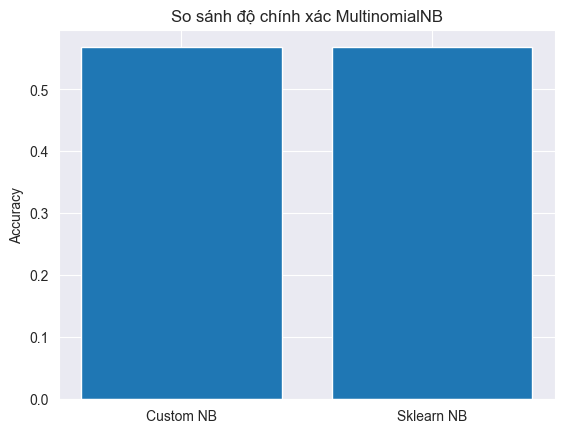

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print("Confusion Matrix - Custom NB:")
print(confusion_matrix(y_val, y_pred_custom))

print("\nConfusion Matrix - Sklearn NB:")
print(confusion_matrix(y_val, y_pred_sklearn))

# Biểu đồ so sánh
plt.bar(["Custom NB", "Sklearn NB"], 
        [accuracy_score(y_val, y_pred_custom), accuracy_score(y_val, y_pred_sklearn)])
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác MultinomialNB")
plt.show()


Dự đoán trên test_values.csv để nộp

In [92]:
final_model = MultinomialNB(alpha=1.0)
final_model.fit(X_encoded, y)

y_test_pred = final_model.predict(X_test_encoded)

submission = pd.DataFrame({
    "building_id": test_values["building_id"],
    "damage_grade": y_test_pred
})
submission.to_csv("submission.csv", index=False)
print("Đã lưu submission.csv")


Đã lưu submission.csv


Bài 2. Đọc các trường đầu vào có dạng nhị phân từ file dữ liệu
1. Hãy sử dụng phương pháp Bernoulli NB đã có, huấn luyện mô hình trên tập training sau đó thực
hiện dự đoán trên tập test chỉ với các trường dữ liệu trên.
2. Thực hiện lại với thư viện Sklearn và so sánh độ chính xác.


Bước 1. Chuẩn bị dữ liệu

In [93]:

import pandas as pd

# Đọc dữ liệu
train_values = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/train_values.csv")
train_labels = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/train_labels (1).csv")
test_values  = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/test_values (1).csv")

# Ghép nhãn
train = train_values.merge(train_labels, on="building_id")

# Các cột nhị phân
bin_features = [
    "has_superstructure_adobe_mud",
    "has_superstructure_mud_mortar_stone",
    "has_superstructure_stone_flag",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered",
    "has_superstructure_rc_engineered",
    "has_superstructure_other",
    "has_secondary_use",
    "has_secondary_use_agriculture",
    "has_secondary_use_hotel",
    "has_secondary_use_rental",
    "has_secondary_use_institution",
    "has_secondary_use_school",
    "has_secondary_use_industry",
    "has_secondary_use_health_post",
    "has_secondary_use_gov_office",
    "has_secondary_use_use_police",
    "has_secondary_use_other"
]

X = train[bin_features].values
y = train["damage_grade"].values
X_test = test_values[bin_features].values


Bước 2. Tự cài đặt Bernoulli NB

In [94]:
import numpy as np
from collections import defaultdict

class MyBernoulliNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.class_prior_ = {c: np.mean(y == c) for c in self.classes}
        self.feature_prob_ = {}
        for c in self.classes:
            X_c = X[y == c]
            # Laplace smoothing
            self.feature_prob_[c] = (X_c.sum(axis=0) + 1) / (X_c.shape[0] + 2)
    
    def predict(self, X):
        y_pred = []
        for x in X:
            log_probs = {}
            for c in self.classes:
                log_prob = np.log(self.class_prior_[c])
                probs = self.feature_prob_[c]
                # Bernoulli likelihood
                log_prob += (x * np.log(probs) + (1 - x) * np.log(1 - probs)).sum()
                log_probs[c] = log_prob
            y_pred.append(max(log_probs, key=log_probs.get))
        return np.array(y_pred)
model_custom = MyBernoulliNB()
model_custom.fit(X, y)
y_pred_custom = model_custom.predict(X_test)


Bước 3. BernoulliNB từ sklearn

In [95]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

print("Sklearn BernoulliNB Accuracy:", accuracy_score(y_val, y_val_pred))


Sklearn BernoulliNB Accuracy: 0.5650313693137123


So sánh

In [96]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model_custom = MyBernoulliNB()
model_custom.fit(X_train, y_train)
y_val_pred_custom = model_custom.predict(X_val)
acc_custom = accuracy_score(y_val, y_val_pred_custom)
print("Độ chính xác (MyBernoulliNB):", acc_custom)
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_val_pred_sklearn = clf.predict(X_val)
acc_sklearn = accuracy_score(y_val, y_val_pred_sklearn)
print("Độ chính xác (sklearn BernoulliNB):", acc_sklearn)


print("\nConfusion Matrix - MyBernoulliNB")
print(confusion_matrix(y_val, y_val_pred_custom))

print("\nConfusion Matrix - Sklearn BernoulliNB")
print(confusion_matrix(y_val, y_val_pred_sklearn))


Độ chính xác (MyBernoulliNB): 0.5673528903896702
Độ chính xác (sklearn BernoulliNB): 0.5673528903896702

Confusion Matrix - MyBernoulliNB
[[ 2332  2684     9]
 [ 2437 26851   364]
 [  198 16858   388]]

Confusion Matrix - Sklearn BernoulliNB
[[ 2332  2684     9]
 [ 2437 26851   364]
 [  198 16858   388]]


C. PHƯƠNG PHÁP NAÏVE BAYES CHO PHÂN LOẠI VĂN BẢN (DL RỜI RẠC)

VD2: Ví dụ này chỉ mang tính minh họa cho việc phân loại văn bản. Tuy nhiên phần chương trình có
thể sử dụng cho bài toán phân loại bằng phương pháp Multinomial NB trong trường hợp các trường dữ
liệu là dạng nhiều lựa chọn.
Giả sử tập training của chúng ta có 04 “văn bản”, được chia làm hai lớp là nội dung về miền bắc (B) và
nội dung về miền nam (N), cụ thể như sau:
Dựa vào tập training, cần dự đoán văn bản dưới đây thuộc lớp Bắc (B) hay Nam (N):
D5: Hà-Nội Hà-Nội bún-chả hủ-tiếu ---- và D6: phở hủ-tiếu bánh-bò.

In [32]:
from __future__ import print_function
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Train data
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]   # class B
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]   # class B
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]   # class B
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]   # class N

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])  # nhãn

# Test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

# Huấn luyện
clf = MultinomialNB()
clf.fit(train_data, label)

# Dự đoán
print('Predicting class of d5:', clf.predict(d5)[0])
print('Predicting class of d6:', clf.predict(d6)[0])

print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))


Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


Chương trình trong python theo phương pháp Bernoulli Naïve Bayes:

In [34]:
from __future__ import print_function
from sklearn.naive_bayes import BernoulliNB
import numpy as np

# train data
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call MultinomialNB
clf = BernoulliNB()
# training
clf.fit(train_data, label)
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


Ví dụ 3:Phân loại email SPAM – NOT.SPAM bằng Naïve Bayes

In [38]:
## packages
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  # for evaluating results

# data path and file name
path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/'
data_fn = 'multinomial_nb_orders (1).csv'

# read data
data = pd.read_csv(path + data_fn)

# features and labels
X = data.drop('cuisine', axis=1)
y = data['cuisine']

# one-hot encoding categorical features
X_encoded = pd.get_dummies(X)

# split dataset (train:test = 7:3)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.47555555555555556


In [55]:

from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix  
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  

# data path and file name
# data path and file name
path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/ex6DataPrepared/'

train_data_fn = 'train-features.txt'
test_data_fn  = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn  = 'test-labels.txt'

# số lượng từ trong từ điển
nwords = 2500

# hàm đọc dữ liệu
def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
        label = [int(x.strip()) for x in content]

    ## read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
        # remove '\n' at the end of each line
        content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype=int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    # tạo ma trận thưa (sparse matrix)
    data = coo_matrix(
        (dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),
        shape=(len(label), nwords)
    )

    return (data, label)

# đọc dữ liệu
train_data, train_label = read_data(train_data_fn, train_label_fn)
test_data, test_label = read_data(test_data_fn, test_label_fn)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# huấn luyện model MultinomialNB
clf = MultinomialNB()
clf.fit(train_data, train_label)

# dự đoán
y_pred = clf.predict(test_data)

# đánh giá
acc = accuracy_score(test_label, y_pred)
print("Accuracy:", acc)


Train data shape: (700, 2500)
Test data shape: (260, 2500)
Accuracy: 0.9807692307692307


Ví dụ 4:Tệp dữ liệu multinomial_nb_orders.csv đính kèm chứa dữ liệu phi văn bản với các trường
dạng category (nhiều lựa chọn). Bối cảnh là đơn đặt món ăn online, cần dự đoán loại ẩm thực (cuisine)
từ nhiều thuộc tính rời rạc:
• city (20 lựa chọn), device (5), user_segment (6), promo (8 + “none”),
• fav_ingredient (20), spice_level (5), day_of_week (7), price_bucket (5)
Nhãn cần dự báo: cuisine với 10 lớp (thai, vietnamese, indian, japanese, ..., chinese). Hãy xây dựng
chương trình thực hiện việc đọc dữ liệu từ tệp CSV, sau đó chia dữ liệu theo tỉ lệ train:test = 7:3; Thực
hiện huấn luyện bằng mô hình Multinomial Naïve Bayes trên tập Train và thực hiện dự đoán cũng như
đánh giá kết quả trên tập Test.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Đọc dữ liệu
data = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab2/multinomial_nb_orders (1).csv")

# 2. Xác định X (features) và y (label)
X = data.drop("cuisine", axis=1)   
y = data["cuisine"]                

# 3. One-hot encoding cho dữ liệu categorical
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X)

# 4. Chia train/test 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Huấn luyện MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 6. Dự đoán
y_pred = clf.predict(X_test)

# 7. Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.47555555555555556

Classification Report:
                precision    recall  f1-score   support

     american       0.63      0.70      0.67       121
      chinese       0.36      0.50      0.42       111
       indian       0.89      0.93      0.91        84
      italian       0.43      0.35      0.38        86
     japanese       0.29      0.31      0.30        91
       korean       0.22      0.03      0.06        59
mediterranean       0.38      0.39      0.38        74
      mexican       0.64      0.53      0.58        92
         thai       0.38      0.38      0.38        93
   vietnamese       0.36      0.42      0.38        89

     accuracy                           0.48       900
    macro avg       0.46      0.45      0.45       900
 weighted avg       0.47      0.48      0.46       900
